This script is used to format data from the "sketchy" dataset [link](http://sketchy.eye.gatech.edu/) into a format for CycleGan from [this](https://github.com/junyanz/pytorch-CycleGAN-and-pix2pix) repo.

## Format of Sketchy dataset
There is a README that contains information about how the data is organized. The contents of this file is pasted below:

Sketchy Database - Rendered sketches and augmented photos

Contents:
  photo - a directory containing two different renderings of 
    all photographs contained within the Sketchy Database
  sketch - a directory containing six different renderings of
    all sketches contained within the Sketchy Database

Photographs
    All photographs are rendered in JPEG format. Resizing is
  performed via OpenCV Imgproc (typically area interpolation
  for full images renderings and cubic for bounding box
  renderings).

  Augmentations (directories within 'photo')
  
    tx_000000000000 : image is non-uniformly scaled to 256x256
    tx_000100000000 : image bounding box scaled to 256x256 with
                      an additional +10% on each edge; note 
                      that due to position within the image,
                      sometimes the object is not centered

Sketches
    All sketches are rendered in PNG format. The original
  sketch canvas size is 640x480. In rendering the sketch to a
  256x256 canvas, we take the original photo aspect ratio
  as well as the original sketch canvas aspect ratio into
  account. We render sketches such that they are consistent
  with the transformation made to the image (non-uniform
  scale to 256x256). In order to ensure sketches remain fully
  on the canvas, some minor adjustments to scale and/or 
  location are occasionally necessary.
    All sketches are rendered using custom OpenGL code, with
  a PNG encoding provided by Java's ImageIO API.

  Augmentations (directories within 'sketch')

    tx_000000000000 : sketch canvas is rendered to 256x256
                      such that it undergoes the same
                      scaling as the paired photo
    tx_000100000000 : sketch is centered and uniformly scaled 
                      such that its greatest dimension (x or y) 
                      fills 78% of the canvas (roughly the same
                      as in Eitz 2012 sketch data set)
    tx_000000000010 : sketch is translated such that it is 
                      centered on the object bounding box
    tx_000000000110 : sketch is centered on bounding box and
                      is uniformly scaled such that one dimension
                      (x or y; whichever requires the least amount
                      of scaling) fits within the bounding box
    tx_000000001010 : sketch is centered on bounding box and
                      is uniformly scaled such that one dimension
                      (x or y; whichever requires the most amount
                      of scaling) fits within the bounding box
    tx_000000001110 : sketch is centered on bounding box and
                      is non-uniformly scaled such that it 
                      completely fits within the bounding box




As a first pass, let's use unaugmented sketches and images

In [2]:
import os
from shutil import copyfile

In [3]:
dataset_root = dataset_root = '../data/sketchy/256x256/'
photos_root = dataset_root + 'photo/'
sketches_root = dataset_root + 'sketch/'
target_class = 'tree'

In [4]:
photos_dir = photos_root + 'tx_000000000000/' + target_class + '/'
sketches_dir = sketches_root + 'tx_000000000000/' + target_class + '/'

In [5]:
print('%s photos'%len(os.listdir(photos_dir)))
print('%s sketches'%len(os.listdir(sketches_dir)))

100 photos
533 sketches


In [6]:
dataset_name = 'sketchy-%s'%target_class
target_root = '../../pytorch-CycleGAN-and-pix2pix/datasets/%s/'%dataset_name
target_photos = target_root + 'trainA/'
target_sketches = target_root + 'trainB/'

In [50]:
if not os.path.exists(target_root):
    os.mkdir(target_root)
if not os.path.exists(target_photos):
    os.mkdir(target_photos)
if not os.path.exists(target_sketches):
    os.mkdir(target_sketches)

In [51]:
for filename in os.listdir(photos_dir):
    copyfile(photos_dir + filename, target_photos + filename)
for filename in os.listdir(sketches_dir):
    copyfile(sketches_dir + filename, target_sketches + filename)

# Using sketches from Google QuickDraw dataset

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
import random

In [8]:
trees = np.load('../data/quickdraw/full_numpy_bitmap_tree.npy')

In [9]:
trees.shape

(144721, 784)

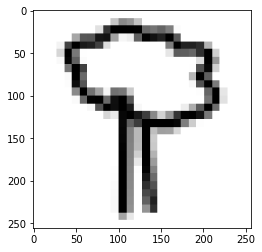

In [10]:
example_tree = cv.resize(trees[456].reshape((28, 28)), (256, 256), interpolation = cv.INTER_AREA)
plt.imshow(example_tree, cmap='gray_r')

In [11]:
all_trees = []
indexes = random.sample(range(0, trees.shape[0]), 500)
for i in indexes:
    all_trees.append(cv.resize(trees[i].reshape((28, 28)), (256, 256), interpolation = cv.INTER_AREA))

In [12]:
dataset_name = 'quickdraw-%s'%target_class
target_root = '../../pytorch-CycleGAN-and-pix2pix/datasets/%s/'%dataset_name
target_photos = target_root + 'trainA/'
target_sketches = target_root + 'trainB/'

In [20]:
if not os.path.exists(target_root):
    os.mkdir(target_root)
if not os.path.exists(target_photos):
    os.mkdir(target_photos)
if not os.path.exists(target_sketches):
    os.mkdir(target_sketches)

In [17]:
photos_dir = photos_root + 'imagenet/%s/'%target_class

In [18]:
photos_dir

'../data/sketchy/256x256/photo/imagenet/tree/'

In [21]:
for filename in os.listdir(photos_dir):
    copyfile(photos_dir + filename, target_photos + filename)
for i, tree in enumerate(all_trees):
    cv.imwrite(target_sketches + 'quick_draw_tree_%s.jpg'%i, 255 - tree)